In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data = pd.read_csv("Train_data.csv")
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


1

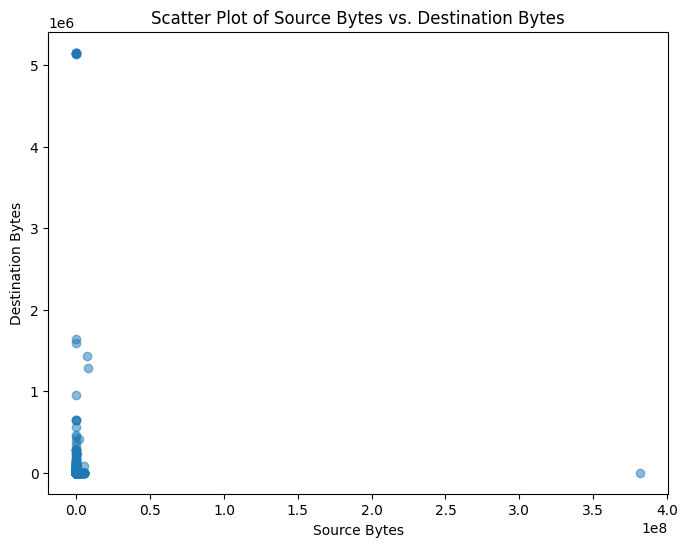

In [ ]:
import matplotlib.pyplot as plt
x = data['src_bytes']
y = data['dst_bytes']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Source Bytes')
plt.ylabel('Destination Bytes')
plt.title('Scatter Plot of Source Bytes vs. Destination Bytes')
plt.show()


2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = data[['dst_host_srv_count']]
y = data['dst_host_same_srv_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 0.0398


3

Linear Regression is typically not the primary choice due to its inherent characteristics, such as its assumption of a continuous target variable, which may not align with the binary nature of intrusion detection (normal vs. malicious). However, if applied, one should consider parameters and attributes like the regression coefficients, intercept, and various performance metrics (e.g., mean squared error) for model evaluation. More suitable models like logistic regression or machine learning techniques, such as Random Forests and Support Vector Machines, are often preferred for network intrusion detection, allowing for effective binary classification based on network features.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
coefficients = model.coef_
intercept = model.intercept_
y_pred = model.predict(X_test)
print(y_pred)
r2_score = model.score(X_test, y_test)
print(r2_score)


[1.02823169 0.57030084 0.11237    ... 1.02823169 1.02823169 1.02823169]
0.8035450754001524


In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

4

In [ ]:
features = data.loc[: , 'duration' : 'dst_host_srv_rerror_rate']
labels = data.loc[: , ['class']]

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score as acs

X_train, X_test, y_train, y_test = tts(features, labels, test_size=0.2, random_state=42)

categ_var_train = X_train.select_dtypes(include=['object'])
categ_var_test = X_test.select_dtypes(include=['object'])

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categ_var_train:
    X_train[col] = label_encoder.fit_transform(X_train[col])

for col in categ_var_test:
    X_test[col] = label_encoder.fit_transform(X_test[col])

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.8950188529470133


5

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
X = data[['duration', 'src_bytes']]
y = data['dst_bytes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_predictions_tree = tree_model.predict(X_test)
tree_mae = mean_absolute_error(y_test, tree_predictions_tree)
tree_mse = mean_squared_error(y_test, tree_predictions_tree)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions_knn = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, knn_predictions_knn)
knn_mse = mean_squared_error(y_test, knn_predictions_knn)

print("Regression Tree MAE:", tree_mae)
print("Regression Tree MSE:", tree_mse)
print("k-NN Regressor MAE:", knn_mae)
print("k-NN Regressor MSE:", knn_mse)

Regression Tree MAE: 2984.6533917120423
Regression Tree MSE: 1313809336.8013833
k-NN Regressor MAE: 4380.571025997221
k-NN Regressor MSE: 7960584307.172337
